# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\serra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
# Read your api key environment variable
load_dotenv("MYKEYS.env")
api_key = os.getenv("NEWS_API_KEY")
print(api_key)

1a198f1030814aa8887bdc26abd222e2


In [13]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [18]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [19]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [20]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin_news["articles"])

bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",https://www.engadget.com/about/editors/saqib-shah,El Salvador becomes the first country to appro...,El Salvador has voted to adopt Bitcoin as lega...,https://www.engadget.com/el-salvador-bitcoin-l...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...
1,"{'id': None, 'name': 'Gizmodo.com'}",Matt Novak,El Salvador Becomes First Country to Recognize...,El Salvador has become the first country in th...,https://gizmodo.com/el-salvador-becomes-first-...,https://i.kinja-img.com/gawker-media/image/upl...,2021-06-09T10:00:00Z,El Salvador has become the first country in th...
2,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \nElon ...",https://mashable.com/article/tesla-bitcoin-pur...,https://mondrian.mashable.com/2021%252F06%252F...,2021-06-14T07:15:49Z,"It's all about clean energy, it seems. \r\nElo..."
3,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Bitcoin: El Salvador makes cryptocurrency lega...,It is the first country in the world to make t...,https://www.bbc.co.uk/news/world-latin-america...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-06-09T08:27:58Z,image captionThe move means bitcoin will be ac...
4,"{'id': None, 'name': 'Gizmodo.com'}",Alyse Stanley,Miami's Bitcoin Conference May Be the Latest C...,"Several crypto fans that descended on Miami, F...",https://gizmodo.com/miamis-bitcoin-conference-...,https://i.kinja-img.com/gawker-media/image/upl...,2021-06-11T00:45:00Z,"Several crypto fans that descended on Miami, F..."


In [22]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = pd.DataFrame.from_dict(ethereum_news["articles"])
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'mashable', 'name': 'Mashable'}",Joseph Green,This blockchain development course bundle is o...,TL;DR: The Cryptocurrency with Ethereum and So...,https://mashable.com/uk/shopping/june-17-crypt...,https://mondrian.mashable.com/2021%252F06%252F...,2021-06-17T04:05:00Z,TL;DR: The Cryptocurrency with Ethereum and So...
1,"{'id': 'mashable', 'name': 'Mashable'}",Tim Marcin,Classic memes that have sold as NFTs,It wasn't long ago that your average person ha...,https://mashable.com/article/classic-memes-sol...,https://mondrian.mashable.com/2021%252F06%252F...,2021-06-20T19:28:07Z,It wasn't long ago that your average person ha...
2,"{'id': 'reuters', 'name': 'Reuters'}",Reuters,Ethereum extends gains to rise 8%; bitcoin fir...,Cryptocurrency Ethereum extended gains to rise...,https://www.reuters.com/technology/ethereum-ri...,https://www.reuters.com/resizer/yeaYVdBQ4_EGCb...,2021-05-31T12:17:00Z,A representation of virtual currency Ethereum ...
3,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur en Español,Ethereum creator Vitalik Buterin made more tha...,Ethereum billionaire founder Vitalik Buterin b...,https://www.entrepreneur.com/article/374264,https://assets.entrepreneur.com/content/3x2/20...,2021-06-10T19:12:00Z,This article was translated from our Spanish e...
4,"{'id': None, 'name': 'Slashdot.org'}",BeauHD,Norton 360 Antivirus Now Lets You Mine Ethereu...,NortonLifelock has added the ability to mine E...,https://slashdot.org/story/21/06/03/0358213/no...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2021-06-03T10:00:00Z,This new mining feature is called 'Norton Cryp...


In [23]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [25]:
# Describe the Ethereum Sentiment
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [26]:
bitcoin_sentiments_df= pd.DataFrame(bitcoin_sentiments)
bitcoin_sentiments_df.head()

,text,date,compound,positive,negative,neutral
0,El Salvador's President Nayib Bukele has made ...,2021-06-09,0.8402,0.282,0.0,0.718
1,El Salvador has become the first country in th...,2021-06-09,0.1280,0.043,0.0,0.957
2,"It's all about clean energy, it seems. \r\nElo...",2021-06-14,0.6908,0.169,0.0,0.831
3,image captionThe move means bitcoin will be ac...,2021-06-09,0.2732,0.060,0.0,0.940
4,"Several crypto fans that descended on Miami, F...",2021-06-11,0.5574,0.107,0.0,0.893


In [27]:
ethereum_sentiments_df= pd.DataFrame(ethereum_sentiments)
ethereum_sentiments_df.head()

,text,date,compound,positive,negative,neutral
0,TL;DR: The Cryptocurrency with Ethereum and So...,2021-06-17,0.000,0.0,0.000,1.000
1,It wasn't long ago that your average person ha...,2021-06-20,-0.296,0.0,0.061,0.939
2,A representation of virtual currency Ethereum ...,2021-05-31,0.000,0.0,0.000,1.000
3,This article was translated from our Spanish e...,2021-06-10,-0.340,0.0,0.066,0.934
4,This new mining feature is called 'Norton Cryp...,2021-06-03,0.000,0.0,0.000,1.000


In [28]:
bitcoin_sentiments_df.describe()


,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.155950,0.070700,0.028300,0.900950
std,0.378432,0.071767,0.036521,0.069026
min,-0.526700,0.000000,0.000000,0.718000
25%,-0.050575,0.000000,0.000000,0.844750
50%,0.128000,0.060500,0.000000,0.922000
75%,0.369700,0.105500,0.062000,0.943750
max,0.840200,0.282000,0.096000,1.000000


In [29]:
ethereum_sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.038165,0.034550,0.020650,0.94480
std,0.299504,0.050623,0.040732,0.06152
min,-0.458800,0.000000,0.000000,0.78200
25%,-0.068300,0.000000,0.000000,0.92700
50%,0.000000,0.000000,0.000000,0.93850
75%,0.225725,0.067750,0.015250,1.00000
max,0.670500,0.188000,0.151000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the higher mean positive score at 0.07 compared to ethereum at 0.03.

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [30]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [37]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('crypto')

# Create a list of stopwords
print(stopwords.words('english'))
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said', 'mln', 'kilolitres','kl'} 


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    words = word_tokenize(text)
    
    # Remove the punctuation from text
    words = list(filter(lambda w: w.lower(), words))
    words = list(filter(lambda t: t not in punctuation, words))
    words = list(filter(lambda t: t.lower() not in sw, words))
  
    # Create a tokenized list of the words
    tokens = [lemmatizer.lemmatize(word) for word in words]    
    return tokens

In [42]:
# Create a new tokens column for Bitcoin
bitcoin_sentiments_df["tokens"]= bitcoin_sentiments_df.text.apply(tokenizer)
bitcoin_sentiments_df.head(10)

,text,date,compound,positive,negative,neutral,tokens
0,El Salvador's President Nayib Bukele has made ...,2021-06-09,0.8402,0.282,0.000,0.718,"[El, Salvador, 's, President, Nayib, Bukele, m..."
1,El Salvador has become the first country in th...,2021-06-09,0.1280,0.043,0.000,0.957,"[El, Salvador, become, first, country, world, ..."
2,"It's all about clean energy, it seems. \r\nElo...",2021-06-14,0.6908,0.169,0.000,0.831,"['s, clean, energy, seems, Elon, Musk, Tesla, ..."
3,image captionThe move means bitcoin will be ac...,2021-06-09,0.2732,0.060,0.000,0.940,"[image, captionThe, move, mean, bitcoin, accep..."
4,"Several crypto fans that descended on Miami, F...",2021-06-11,0.5574,0.107,0.000,0.893,"[Several, crypto, fan, descended, Miami, Flori..."
5,"Hello friends, and welcome back to Week in Rev...",2021-06-05,0.7500,0.154,0.000,0.846,"[Hello, friend, welcome, back, Week, Review, L..."
6,In spite of the environmental and regulatory i...,2021-05-27,-0.5267,0.000,0.096,0.904,"[spite, environmental, regulatory, ill, genera..."
7,"By Mary-Ann RussonBusiness reporter, BBC News\...",2021-06-08,0.3400,0.070,0.000,0.930,"[Mary-Ann, RussonBusiness, reporter, BBC, News..."
8,"After years of hesitation, PayPal continues to...",2021-05-27,-0.2732,0.000,0.062,0.938,"[year, hesitation, PayPal, continues, double, ..."
9,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",2021-06-16,0.1280,0.043,0.000,0.957,"[SAN, SALVADOR, June, 16, Reuters, El, Salvado..."


In [43]:
# Create a new tokens column for Ethereum
ethereum_sentiments_df["tokens"]= ethereum_sentiments_df.text.apply(tokenizer)
ethereum_sentiments_df.head(10)

,text,date,compound,positive,negative,neutral,tokens
0,TL;DR: The Cryptocurrency with Ethereum and So...,2021-06-17,0.0000,0.000,0.000,1.000,"[TL, DR, Cryptocurrency, Ethereum, Solidity, B..."
1,It wasn't long ago that your average person ha...,2021-06-20,-0.2960,0.000,0.061,0.939,"[n't, long, ago, average, person, clue, NFT, N..."
2,A representation of virtual currency Ethereum ...,2021-05-31,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, Ethereum, ..."
3,This article was translated from our Spanish e...,2021-06-10,-0.3400,0.000,0.066,0.934,"[article, translated, Spanish, edition, using,..."
4,This new mining feature is called 'Norton Cryp...,2021-06-03,0.0000,0.000,0.000,1.000,"[new, mining, feature, called, 'Norton, Crypto..."
5,"""We are building a team"" the page declares, st...",2021-05-27,0.6705,0.188,0.000,0.812,"[``, building, team, '', page, declares, stati..."
6,Opinions expressed by Entrepreneur contributor...,2021-05-31,0.1280,0.051,0.000,0.949,"[Opinions, expressed, Entrepreneur, contributo..."
7,CryptoPunks represent the only historically re...,2021-06-04,-0.4588,0.067,0.151,0.782,"[CryptoPunks, represent, historically, relevan..."
8,By Cristina CriddleTechnology reporter\r\nimag...,2021-05-29,0.0000,0.000,0.000,1.000,"[Cristina, CriddleTechnology, reporter, image,..."
9,"In March 2020, blockchain protocol solana offi...",2021-05-28,0.2023,0.091,0.000,0.909,"[March, 2020, blockchain, protocol, solana, of..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
from collections import Counter
from nltk import ngrams

In [62]:
# Generate the Bitcoin N-grams where N=2

bigram_counts =(ngrams(tokenizer(bitcoin_sentiments_df.text.str.cat(), 2))
Counter(bigram_counts)

SyntaxError: invalid syntax (<ipython-input-62-71e46ddc20c1>, line 4)

In [63]:
# Generate the Ethereum N-grams where N=2
bigram_counts_eth =(ngrams(tokenizer(bitcoin_sentiments_df.text.str.cat(), 2))
Counter(bigram_counts_eth)

SyntaxError: invalid syntax (<ipython-input-63-da06028d0f6c>, line 3)

In [64]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [65]:
# Use token_count to get the top 10 words for Bitcoin
Counter(bigram_counts).most_common(10)

NameError: name 'bigram_counts' is not defined

In [66]:
# Use token_count to get the top 10 words for Ethereum
Counter(bigram_counts_eth).most_common(10)

NameError: name 'bigram_counts_eth' is not defined

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

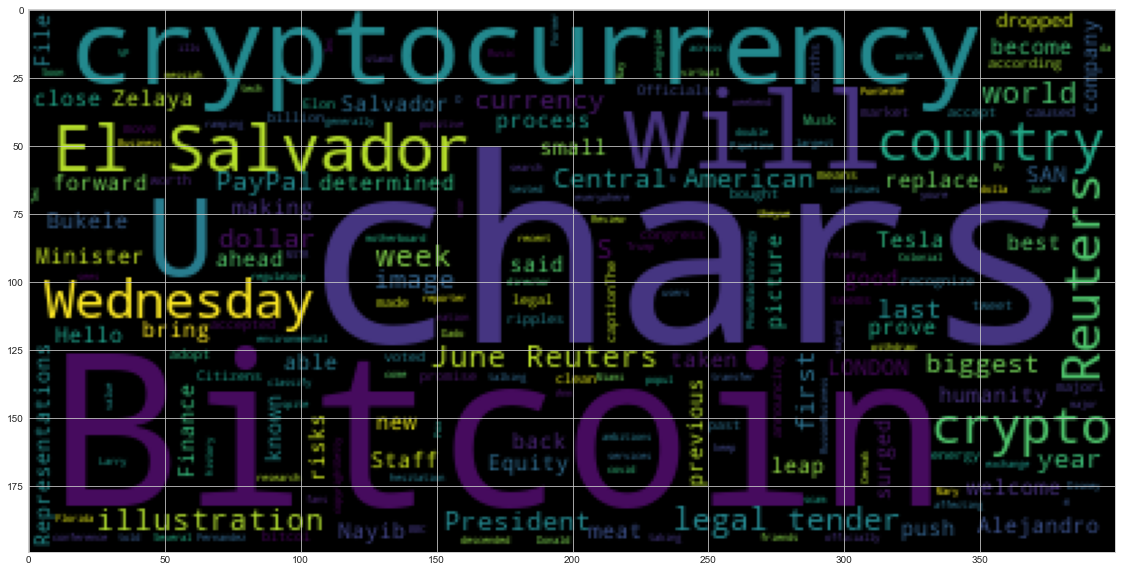

In [72]:
# Generate the Bitcoin word cloud

wc = WordCloud().generate(bitcoin_sentiments_df.text.str.cat())
plt.imshow(wc)

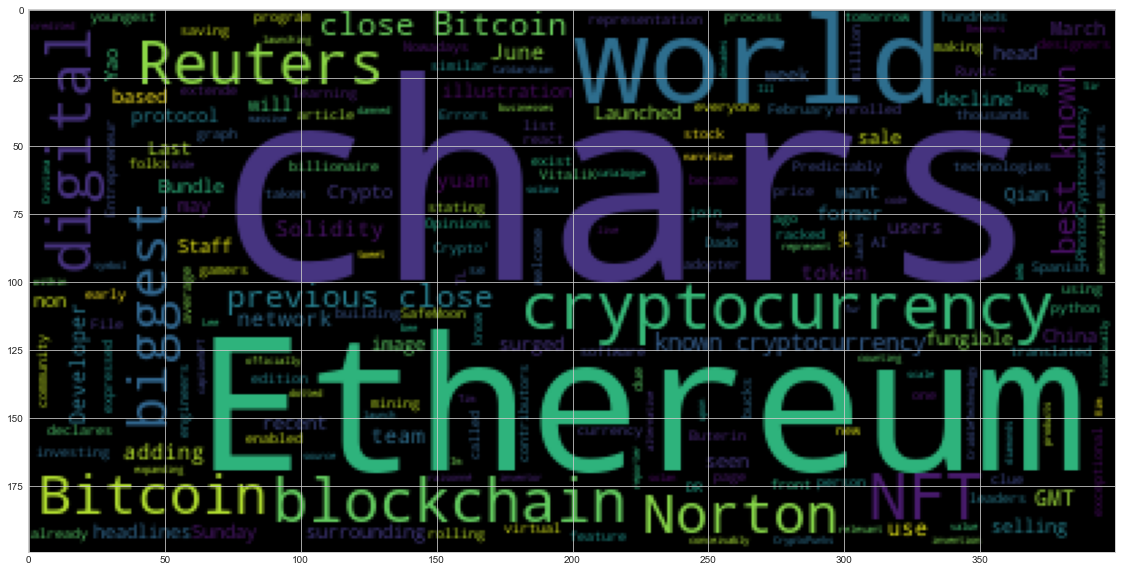

In [73]:
# Generate the Ethereum word cloud

wc = WordCloud().generate(ethereum_sentiments_df.text.str.cat())
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [74]:
import spacy
from spacy import displacy

In [75]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [76]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [77]:
# Concatenate all of the Bitcoin text together
bitcoin_ner=bitcoin_sentiments_df.text.str.cat()
bitcoin_ner

'El Salvador\'s President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country\'s congress voted to accept the cryptocurrency by a majori… [+1414 chars]El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars]It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]image captionThe move means bitcoin will be accepted everywhere for goods and services, alongside the US dollar\r\nEl Salvador has become the first country in the world to officially classify Bitcoin a… [+2233 chars]Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying theyv

In [79]:
# Run the NER processor on all of the text
doc= nlp(bitcoin_ner)

# Add a title to the document
doc.user_data["Bitcoin Title"]= "Bitcoin News"

In [81]:
# Render the visualization
displacy.render(doc)

In [85]:
# List all Entities
for ent in doc.ents: 
    print(ent.text, ent.label_)

El Salvador's GPE
Nayib Bukele PERSON
Central American NORP
Salvador ORG
first ORDINAL
Nayib Bukele PERSON
Wednesday DATE
Citizens ORG
Elon Musk PERSON
Tesla PERSON
the past few months DATE
first ORDINAL
Tesla ORG
$1.5 billion MONEY
US GPE
El Salvador GPE
first ORDINAL
Bitcoin PERSON
Miami GPE
Florida GPE
last weekend DATE
covid-19 PERSON
Larry Cermak PERSON
Last week DATE
Disney ORG
This week DATE
Tec PERSON
PayPals ORG
Wednesday DATE
Jose Fernandez da Pontethe PERSON
Mary-Ann RussonBusiness PERSON
BBC News ORG
US GPE
Donald Trump PERSON
Fox Business ORG
Bitcoin PERSON
US GPE
PayPal PERSON
Soon PERSON
PayPal PERSON
U.S. GPE
Bitcoin PERSON
SALVADOR ORG
June 16 DATE
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
Central American NORP
June 23 DATE
Reuters ORG
El Salvador GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
Bitcoin PERSON
May 20, 2021 DATE
Reuters ORG
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednes

---

### Ethereum NER

In [86]:
# Concatenate all of the Ethereum text together
eth_ner=ethereum_sentiments_df.text.str.cat()
eth_ner

'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars]It wasn\'t long ago that your average person had no clue what an NFT was. Nowadays, they\'re making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars]A representation of virtual currency Ethereum is seen in front of a stock graph in this illustration taken February 19, 2021. REUTERS/Dado Ruvic/Illustration/File PhotoCryptocurrency Ethereum extende… [+1099 chars]This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nLast May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars]This new mining feature is called \'Norton Crypto\' and will be rolling out tomorrow to Norton 360 users enrolled in Norton\'s early adopt

In [87]:
# Run the NER processor on all of the text
doc= nlp(eth_ner)

# Add a title to the document
doc.user_data["Ethereum Title"]= "Ethereum News"


In [88]:
# Render the visualization
displacy.render(doc)

In [89]:
# List all Entities
for ent in doc.ents: 
    print(ent.text, ent.label_)

21.25 MONEY
June 17 DATE
97% PERCENT
NFT ORG
hundreds of thousands CARDINAL
Ethereum ORG
February 19, 2021 DATE
Spanish NORP
AI ORG
Last May DATE
Buterin PERSON
27 CARDINAL
tomorrow DATE
Norton ORG
Norton ORG
Norton Crypto PERSON
chars]"We NORP
Entrepreneur ORG
March 2021 DATE
more than one million CARDINAL
SafeMoon ORG
decades DATE
Ill PERSON
Jacks ORG
CriddleTechnology ORG
Kim Catdarshian PERSON
Ethereum ORG
March 2020 DATE
Tim Berners-Lee PERSON
NFT ORG
Sotheby's ORG
NFT ORG
Ethereum ORG
Keep Network ORG
Last week DATE
NFT ORG
as much as CARDINAL
90 percent PERCENT
recent weeks DATE
Qian PERSON
China GPE
Sina Finance ORG
Monday DATE
Costfoto PERSON
Barcroft Media PERSON
Getty Images ORG
Yao Qian PERSON
China GPE
8.54 % PERCENT
36,265 MONEY
Wednesday DATE
2,853.31 MONEY
Bitcoin PERSON
30.8% PERCENT
year DATE
27,734 MONEY
Jan. DATE
5.71% PERCENT
35,210 MONEY
0600 CARDINAL
GMT ORG
Saturday DATE
2,131.11 MONEY
Bitcoin PERSON
45.7% PERCENT
2021 DATE
6 MONEY
Reuters ORG
June 13 DATE
Reute

---